In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from espectro import espectro1D

49


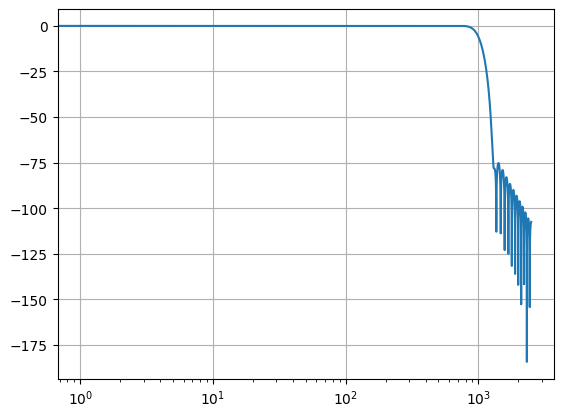

In [ ]:
fc = (1200+800)/2
fs = 5000

Bw = 400
M = int(4//(Bw/fs))
t = np.arange(0,49,1)

hpb = signal.firwin(M, fc, window = 'blackman', fs = fs, pass_zero = 'lowpass')
print(len(hpb))

plt.figure()
f, H = signal.freqz(hpb, 1, worN = int(fs/2), fs = fs)
plt.semilogx(f, 20*np.log10(abs(H)))
plt.grid()

ATIVIDADE 13

In [ ]:
from sinalAtv13_2024S2 import sinalAtv13

numMat = 2021007929
sinalAtv13(numMat)

with open('sinalAtv13.npy', 'rb') as arq:
    Ts = np.load(arq)
    s = np.load(arq)


0.0001


252.0
640.0
1176.0
1350.0
2490.0


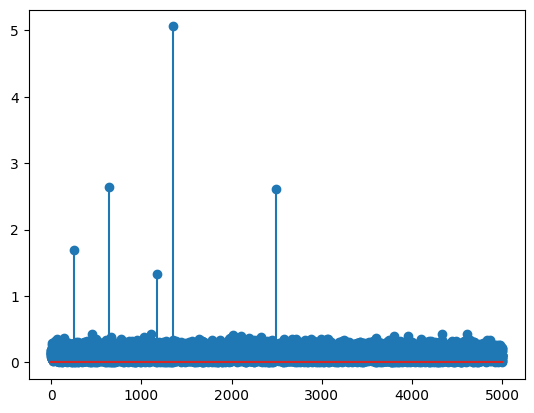

In [ ]:
fs = 1/Ts

N = len(s)
S = np.fft.fft(s)
df = fs/N
ft = np.arange(0, fs, df)

plt.figure()
plt.stem(ft[0:15000], 2*abs(S[0:15000])/N)

for k in range(0, len(ft[0:15000])):
    if (2*abs(S[k])/N >= 1):
        print(f[k])

0.005816238680902979 de ganho em 252 Hz
0.9941062618689918 de ganho 640 Hz
1.0000018744465984 de ganho 1350 Hz
3.959350786940728e-05 de ganho 2490 Hz


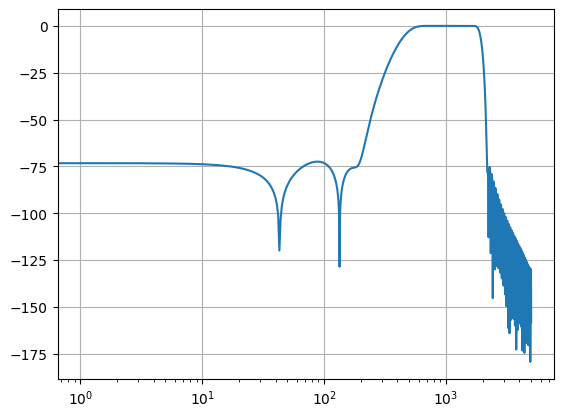

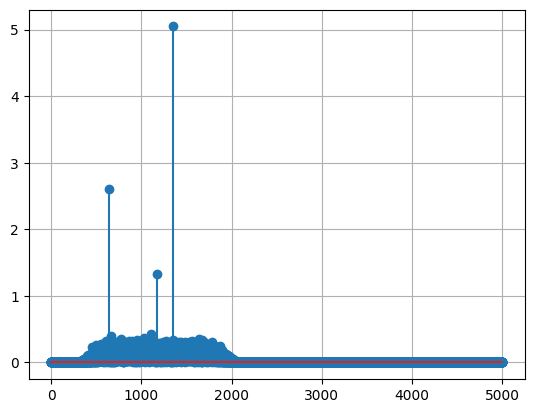

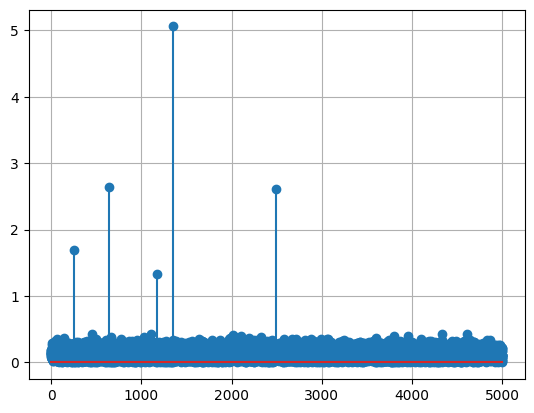

In [ ]:
# Parametros
ws1 = 252
wp1 = 640
wp2 = 1350
ws2 = 2490

fc1 = (wp1+ws1)/2
Bw1 = wp1-ws1

fc2 = (wp2+ws2)/2
Bw2 = (ws2-wp2)

# Normalização

fc1n = fc1/fs
fc2n = fc2/fs
Bw1n = Bw1/fs
Bw2n = Bw2/fs

# Quantidade de amostras

M1 = 4/Bw1n
M2 = 4/Bw2n

# O maior entre os dois foi 103.09, foi adotado 106 para atingir a especificação

M = 112

hbp = signal.firwin(M, [fc1, fc2], window = 'blackman', fs = fs, pass_zero = 'bandpass')


plt.figure()
f, H = signal.freqz(hbp, 1, worN=int(fs/2), fs = fs)
plt.semilogx(f, 20*np.log10(H))
plt.grid()

print(abs(H[252]), 'de ganho em 252 Hz')
print(abs(H[640]), 'de ganho 640 Hz')
print(abs(H[1350]), 'de ganho 1350 Hz')
print(abs(H[2490]), 'de ganho 2490 Hz')

# Convolução e retirada do end effect

sf = np.convolve(s, hbp)
sf = sf[int(M-1/2):int(len(sf)+(M-1)/2)]

N = len(sf)
SF = np.fft.fft(sf)
df = fs/N
f = np.arange(0, fs, df)

plt.figure()
plt.stem(f[0:15000], 2*abs(SF[0:15000])/N)
plt.grid()

plt.figure()
plt.stem(ft[0:15000], 2*abs(S[0:15000])/N)
plt.grid()

In [ ]:
print((2*abs(SF[252*3])/N), 'que equivale a ', ((2*abs(SF[252*3])/N)/(2*abs(S[252*3])/N))*100, '% do sinal original')
print((2*abs(SF[640*3])/N), 'que equivale a ', ((2*abs(SF[640*3])/N)/(2*abs(S[640*3])/N))*100, '% do sinal original')
print((2*abs(SF[1350*3])/N), 'que equivale a ', ((2*abs(SF[1350*3])/N)/(2*abs(S[1350*3])/N))*100, '% do sinal original')
print((2*abs(SF[2490*3])/N), 'que equivale a ', ((2*abs(SF[2490*3])/N)/(2*abs(S[2490*3])/N))*100, '% do sinal original')

0.009285530749961003 que equivale a  0.5507220789560668 % do sinal original
2.61191475239427 que equivale a  99.0559450778933 % do sinal original
5.045809350300422 que equivale a  99.7577045154331 % do sinal original
0.0008784083833373859 que equivale a  0.03372437008744407 % do sinal original
